# Notebook to Calculate RAV

In [2]:
import os
import shutil
import zipfile
import tarfile
import urllib
import requests
from pathlib import Path
from tqdm import tqdm
import h5py as h5

In [3]:
import numpy as np
import awkward as ak
import uproot
import vector
vector.register_awkward()

In [4]:
import matplotlib.pyplot as plt

In [5]:
import torch

/Users/billyli/miniforge_x86_new/envs/weaver/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
root_dir = Path("/Users/billyli/scope/JetClass/minimal")
list(root_dir.glob('*.root'))

[PosixPath('/Users/billyli/scope/JetClass/minimal/HToCC_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/WToQQ_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/ZToQQ_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToBB_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToGG_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToWW2Q1L_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/TTBarLep_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/TTBar_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/ZJetsToNuNu_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToWW4Q_120.root')]

In [7]:
f = list(root_dir.glob('*.root'))[0]
f.name.split('_')

['HToCC', '120.root']

In [8]:
example_file_path = "/Users/billyli/scope/JetClass/minimal/HtoBB_120.root"

## Get Jet Mass from Root Files

In [9]:
def feature_to_numpy(tree, feature):
    return tree[feature].arrays().to_numpy().astype(float)

In [10]:
jet_sdmass = {}
for f in root_dir.glob('*.root'):
    process = f.name.split('_')[0]
    tree = uproot.open(f)['tree']
    jet_sdmass[process] = feature_to_numpy(tree, 'jet_sdmass')
print(list(tree.keys()))

['part_px', 'part_py', 'part_pz', 'part_energy', 'part_deta', 'part_dphi', 'part_d0val', 'part_d0err', 'part_dzval', 'part_dzerr', 'part_charge', 'part_isChargedHadron', 'part_isNeutralHadron', 'part_isPhoton', 'part_isElectron', 'part_isMuon', 'label_QCD', 'label_Hbb', 'label_Hcc', 'label_Hgg', 'label_H4q', 'label_Hqql', 'label_Zqq', 'label_Wqq', 'label_Tbqq', 'label_Tbl', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_energy', 'jet_nparticles', 'jet_sdmass', 'jet_tau1', 'jet_tau2', 'jet_tau3', 'jet_tau4', 'aux_genpart_eta', 'aux_genpart_phi', 'aux_genpart_pid', 'aux_genpart_pt', 'aux_truth_match']


In [11]:
jet_sdmass

{'HToCC': array([115.258255  , 111.84100342, 125.46985626, ..., 128.40882874,
        135.57939148, 141.51844788]),
 'WToQQ': array([72.61198425, 89.07801056, 76.53503418, ..., 76.12161255,
        79.85035706, 83.38143921]),
 'ZToQQ': array([ 84.99334717,  85.89722443,  80.36242676, ...,  94.44278717,
         72.22348022, 111.22592163]),
 'HToBB': array([236.60557556, 244.01182556, 113.34453583, ..., 125.35571289,
         45.36766052, 131.21665955]),
 'HToGG': array([122.22318268, 118.07779694, 120.23336029, ..., 120.01646423,
        119.24666595, 154.14793396]),
 'HToWW2Q1L': array([5.11340215e-04, 3.89420967e+01, 9.82005386e+01, ...,
        1.09459663e+02, 7.13239441e+01, 4.06601868e+01]),
 'TTBarLep': array([102.27770996,  74.19477081, 113.57976532, ..., 107.22871399,
        129.00959778, 142.58552551]),
 'TTBar': array([149.57839966,  80.48643494, 171.76864624, ..., 166.25233459,
        176.77210999, 178.86199951]),
 'ZJetsToNuNu': array([ 4.84817028,  7.31240273, 54.5573539

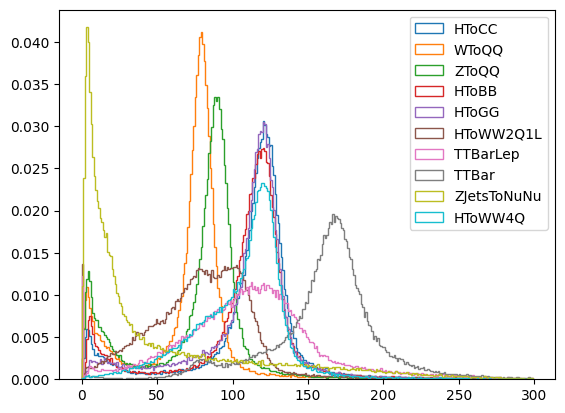

In [12]:
for k, v in jet_sdmass.items():
    plt.hist(v, label=k, bins=np.arange(0, 300, 1), density=True, histtype='step')
plt.legend()

(array([1.10637271e-02, 2.38171870e-02, 3.59269392e-02, 4.17203090e-02,
        4.00305761e-02, 3.39958159e-02, 3.02844384e-02, 2.63216125e-02,
        2.40686353e-02, 2.24291921e-02, 2.11015449e-02, 2.03572578e-02,
        1.90899582e-02, 1.85971194e-02, 1.76617316e-02, 1.68068072e-02,
        1.73298198e-02, 1.51371902e-02, 1.47650467e-02, 1.46544094e-02,
        1.30551979e-02, 1.22907950e-02, 1.13352913e-02, 1.02590924e-02,
        9.82660122e-03, 8.98173479e-03, 8.72022852e-03, 7.71443515e-03,
        7.50321854e-03, 7.05061152e-03, 6.78910525e-03, 6.42701963e-03,
        6.51754104e-03, 5.66261667e-03, 5.73302221e-03, 5.27035726e-03,
        5.28041519e-03, 5.50168973e-03, 4.74734471e-03, 4.78757644e-03,
        4.99879305e-03, 4.19415835e-03, 4.13381075e-03, 4.09357902e-03,
        4.25450595e-03, 3.99299968e-03, 4.34502736e-03, 3.70131960e-03,
        3.81195687e-03, 3.69126167e-03, 4.04328935e-03, 3.95276794e-03,
        3.56050853e-03, 3.67114580e-03, 3.52027679e-03, 3.339233

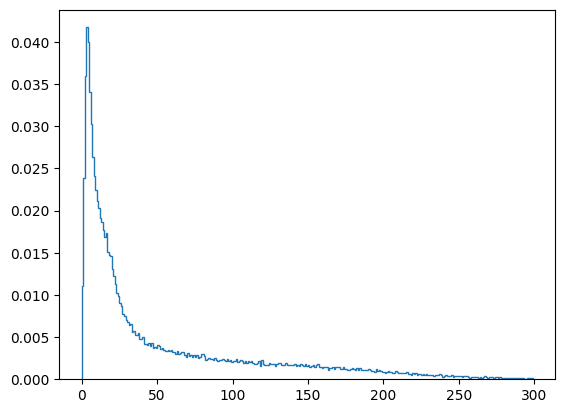

In [13]:
plt.hist(jet_sdmass['ZJetsToNuNu'], label='ZJetsToNuNu', bins=np.arange(0, 300, 1), density=True, histtype='step')

In [14]:
jet_sdmass.keys()

dict_keys(['HToCC', 'WToQQ', 'ZToQQ', 'HToBB', 'HToGG', 'HToWW2Q1L', 'TTBarLep', 'TTBar', 'ZJetsToNuNu', 'HToWW4Q'])

In [15]:
len(jet_sdmass['ZJetsToNuNu'])

100000

## Load the last class token

In [16]:
file = h5.File('/Users/billyli/scope/weaver-core/frac_3e-3.h5', 'r')

In [17]:
X = np.array(file['hidden_11'][:]).astype('double').squeeze(1)
print(X.shape, X.mean(axis=1), X.std(axis=1))

(3000, 128) [-0.00945602  0.01222034  0.02843075 ... -0.0113257   0.02135813
  0.05268254] [0.45121157 0.56909717 0.51576409 ... 0.43475405 0.40127788 0.71692074]


## Linear Regression to get the coefficient vector

In [18]:
jet_sdmass_all_list = list(jet_sdmass.values())
jet_sdmass_all_list = [x[..., np.newaxis] for x in jet_sdmass_all_list]
jet_sdmass_all = np.concatenate(jet_sdmass_all_list, axis=0)
y_tensor = torch.tensor(jet_sdmass_all)

In [19]:
X_tensor = torch.tensor(X)
X_tensor = torch.cat([X_tensor, torch.ones(X_tensor.size(0), 1)], dim=1)

In [20]:
y_tensor = y_tensor[:3000, :]

In [21]:
w_tensor = torch.linalg.pinv(X_tensor.T @ X_tensor) @ (X_tensor.T @ y_tensor)

In [22]:
w_tensor

tensor([[-2.3660e+01],
        [ 1.5566e+04],
        [ 5.2804e+05],
        [-1.0561e+04],
        [ 1.6210e+04],
        [ 2.3653e+05],
        [ 1.7134e+04],
        [ 1.0081e+05],
        [ 3.8391e+05],
        [ 9.0550e+04],
        [ 3.1372e+04],
        [ 4.9467e+05],
        [ 1.9017e+05],
        [ 4.0912e+05],
        [ 2.5250e+05],
        [-1.0231e+06],
        [ 2.4364e+00],
        [-4.9324e+05],
        [-3.5039e-01],
        [ 1.7832e+05],
        [ 1.9643e+04],
        [ 1.5005e+03],
        [-4.4634e+05],
        [ 1.6064e+05],
        [ 1.5693e+01],
        [ 7.4445e+00],
        [-6.6580e+05],
        [-9.5709e+05],
        [ 5.1296e+05],
        [ 6.4738e+05],
        [-6.3513e+05],
        [-6.4118e+05],
        [ 3.7555e+05],
        [ 1.6852e+05],
        [ 9.6082e+04],
        [-5.6012e+05],
        [-1.8425e+05],
        [ 1.5181e+05],
        [-1.2154e+05],
        [ 1.2914e+06],
        [-7.9826e+04],
        [ 3.6412e+03],
        [-1.3543e+05],
        [-6

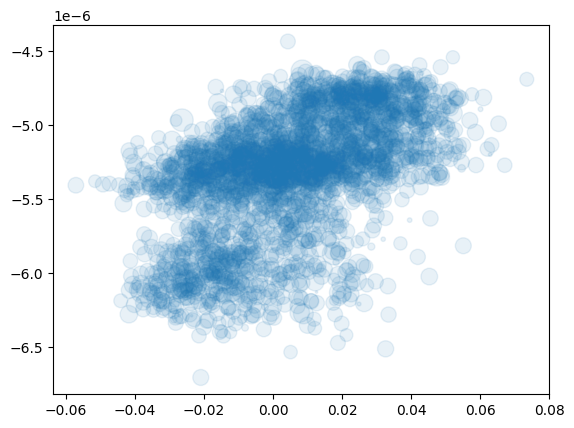

In [23]:
plt.scatter(X[:, 0], X[:, 1], s=y_tensor, alpha=0.1)
# def func(x, w):
#     return x * w[0] / w[1]
# plt.scatter(X[:, 0], func(X[:, 0], w_tensor.numpy()), color='red')

In [24]:
len(jet_sdmass_all_list)

10

In [26]:
with h5.File("rav_sdmass.h5", 'w') as f:
    f.create_dataset('RAV_jet_sdmass', data=w_tensor.cpu().numpy())